<center><h1>DSCI 552 HW5</h1></center>

Name: Wenyu Yang
<br>
Github Username:wenyu-y
<br>
USC ID: 2609125538

In [89]:
# packages for this homework6
import pandas as pd  # data processing
import numpy as np   # N-DIMENSIONAL ARRAYS
from sklearn.impute import SimpleImputer   # dealing with missing values
import seaborn as sns # visualization
import matplotlib.pyplot as plt  # visualization
from sklearn import metrics  #confusion metrics
from sklearn.ensemble import RandomForestClassifier    #train random model
from sklearn.metrics import mean_squared_error   #test and train error 
import xgboost as xgb
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn import svm

<h3>1. Tree-Based Methods</h3>

<h5>(b) i.Research what types of techniques are usually used for dealing with data with
missing values.Pick at least one of them and apply it to this data in the
next steps.</h5>

In [6]:
test_data=pd.read_csv('../data/aps_failure_test_set.csv',sep=',',skiprows=20)
test_data=test_data.replace('na',np.nan)
test_data  # read data

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0,20,12,0,0,0,0,0,...,1098,138,412,654,78,88,0,0,0,0
1,neg,82,0,68,40,0,0,0,0,0,...,1068,276,1620,116,86,462,0,0,0,0
2,neg,66002,2,212,112,0,0,0,0,0,...,495076,380368,440134,269556,1315022,153680,516,0,0,0
3,neg,59816,NaN,1010,936,0,0,0,0,0,...,540820,243270,483302,485332,431376,210074,281662,3232,0,0
4,neg,1814,NaN,156,140,0,0,0,0,0,...,7646,4144,18466,49782,3176,482,76,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,neg,81852,NaN,2130706432,892,0,0,0,0,0,...,632658,273242,510354,373918,349840,317840,960024,25566,0,0
15996,neg,18,0,52,46,8,26,0,0,0,...,266,44,46,14,2,0,0,0,0,0
15997,neg,79636,NaN,1670,1518,0,0,0,0,0,...,806832,449962,778826,581558,375498,222866,358934,19548,0,0
15998,neg,110,NaN,36,32,0,0,0,0,0,...,588,210,180,544,1004,1338,74,0,0,0


In [7]:
train_data=pd.read_csv('../data/aps_failure_training_set.csv',sep=',',skiprows=20)
train_data=train_data.replace('na',np.nan)
train_data  # read data

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,NaN,0,NaN,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,NaN,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,NaN,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002,NaN,664,186,0,0,0,0,0,...,998500,566884,1290398,1218244,1019768,717762,898642,28588,0,0
59996,neg,2286,NaN,2130706538,224,0,0,0,0,0,...,10578,6760,21126,68424,136,0,0,0,0,0
59997,neg,112,0,2130706432,18,0,0,0,0,0,...,792,386,452,144,146,2622,0,0,0,0
59998,neg,80292,NaN,2130706432,494,0,0,0,0,0,...,699352,222654,347378,225724,194440,165070,802280,388422,0,0


In [8]:
test_x=test_data.iloc[:,1:]
# fill missing values with mean column values
imputer = SimpleImputer(strategy = 'mean')
imputer.fit(test_x)
# Imputing the missing values
test_x=pd.DataFrame(imputer.transform(test_x))
test_x.columns=test_data.iloc[:,1:].columns
test_y=test_data.iloc[:,:1]
test_df=pd.concat([test_data.iloc[:,:1],test_x], axis=1)
test_df

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60.0,0.000000,2.000000e+01,12.0,0.0,0.0,0.0,0.0,0.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,neg,82.0,0.000000,6.800000e+01,40.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,neg,66002.0,2.000000,2.120000e+02,112.0,0.0,0.0,0.0,0.0,0.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,neg,59816.0,0.772065,1.010000e+03,936.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,neg,1814.0,0.772065,1.560000e+02,140.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,neg,81852.0,0.772065,2.130706e+09,892.0,0.0,0.0,0.0,0.0,0.0,...,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
15996,neg,18.0,0.000000,5.200000e+01,46.0,8.0,26.0,0.0,0.0,0.0,...,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
15997,neg,79636.0,0.772065,1.670000e+03,1518.0,0.0,0.0,0.0,0.0,0.0,...,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0
15998,neg,110.0,0.772065,3.600000e+01,32.0,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


In [9]:
train_x=train_data.iloc[:,1:]
# fill missing values with mean column values
imputer = SimpleImputer(strategy = 'mean')
imputer.fit(train_x)
# Imputing the missing values
train_x=pd.DataFrame(imputer.transform(train_x))
train_x.columns=train_data.iloc[:,1:].columns
train_y=train_data.iloc[:,:1]
train_df=pd.concat([train_data.iloc[:,:1],train_x], axis=1)
train_df

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698.0,0.713189,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058.0,0.713189,0.000000e+00,190620.639314,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040.0,0.713189,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12.0,0.000000,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874.0,0.713189,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002.0,0.713189,6.640000e+02,186.000000,0.0,0.0,0.0,0.0,0.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,neg,2286.0,0.713189,2.130707e+09,224.000000,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,neg,112.0,0.000000,2.130706e+09,18.000000,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,neg,80292.0,0.713189,2.130706e+09,494.000000,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


In [10]:
data=pd.concat([train_df,test_df], axis=0)
data_x=data.iloc[:,1:]
data_y=data.iloc[:,:1]
data

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698.0,0.713189,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058.0,0.713189,0.000000e+00,190620.639314,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040.0,0.713189,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12.0,0.000000,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874.0,0.713189,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,neg,81852.0,0.772065,2.130706e+09,892.000000,0.0,0.0,0.0,0.0,0.0,...,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
15996,neg,18.0,0.000000,5.200000e+01,46.000000,8.0,26.0,0.0,0.0,0.0,...,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
15997,neg,79636.0,0.772065,1.670000e+03,1518.000000,0.0,0.0,0.0,0.0,0.0,...,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0
15998,neg,110.0,0.772065,3.600000e+01,32.000000,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


<h5>(b) ii. For each of the 170 features, calculate the coefficient of variation CV = ms , where s is sample standard deviation and m is sample mean.</h5>

In [11]:
cv=data_x.apply(lambda x: np.std(x, ddof=1) / np.mean(x) * 100)
cv

aa_000      432.860784
ab_000      217.839732
ac_000      216.764841
ad_000    20678.680935
ae_000     2229.399814
              ...     
ee_007      488.508596
ee_008      333.501896
ee_009      575.391710
ef_000     4792.513454
eg_000     4564.851630
Length: 170, dtype: float64

<h5>(b) iii. Plot a correlation matrix for your features using pandas or any other tool.</h5>

In [12]:
matrix=data_x.corr()
matrix

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
aa_000,1.000000,0.019908,-0.011646,-0.000574,0.025784,0.035977,0.011681,0.076379,0.195163,0.307445,...,0.414127,0.419914,0.409662,0.419784,0.425682,0.356969,0.259670,0.133764,0.006660,0.010344
ab_000,0.019908,1.000000,-0.010893,0.000026,0.024889,0.043279,0.000557,0.006667,0.023633,0.035837,...,0.025249,0.037150,0.028872,0.034329,0.024029,0.013594,0.002437,0.000527,0.046882,0.075719
ac_000,-0.011646,-0.010893,1.000000,-0.002032,-0.004769,-0.010612,0.015535,-0.002333,-0.009436,-0.022885,...,-0.009806,-0.006434,-0.007958,-0.008110,-0.014677,-0.018630,0.010436,0.017292,-0.006192,0.015826
ad_000,-0.000574,0.000026,-0.002032,1.000000,-0.000193,-0.000234,-0.000041,-0.000054,-0.000123,-0.000256,...,-0.000901,-0.000942,-0.000932,-0.000761,-0.000767,-0.000469,-0.000805,-0.000503,-0.000082,-0.000091
ae_000,0.025784,0.024889,-0.004769,-0.000193,1.000000,0.829986,-0.000441,-0.000609,0.001946,0.020674,...,0.012750,0.019440,0.012845,0.026435,0.066532,0.036618,-0.008391,-0.006949,0.063587,0.030854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ee_007,0.356969,0.013594,-0.018630,-0.000469,0.036618,0.046481,0.007631,0.068003,0.181968,0.475571,...,0.442199,0.432911,0.419633,0.380132,0.543449,1.000000,0.227099,0.063065,-0.000312,0.000948
ee_008,0.259670,0.002437,0.010436,-0.000805,-0.008391,-0.010839,0.000067,0.005354,0.009112,0.020687,...,0.442533,0.470574,0.448390,0.394021,0.365686,0.227099,1.000000,0.690147,-0.005169,-0.001952
ee_009,0.133764,0.000527,0.017292,-0.000503,-0.006949,-0.008533,-0.001103,-0.003539,-0.009088,-0.018163,...,0.224587,0.235844,0.220785,0.183844,0.158590,0.063065,0.690147,1.000000,-0.003161,-0.001063
ef_000,0.006660,0.046882,-0.006192,-0.000082,0.063587,0.093474,-0.000076,0.001133,0.005610,0.011018,...,0.003711,0.010169,0.002979,0.026910,0.005291,-0.000312,-0.005169,-0.003161,1.000000,0.222579


In [99]:
data_x.corr().style.background_gradient(cmap='coolwarm')

/Users/yangwenyu/opt/anaconda3/lib/python3.9/site-packages/pandas/io/formats/style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/Users/yangwenyu/opt/anaconda3/lib/python3.9/site-packages/pandas/io/formats/style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


<h5>(b)iv. Pick ⌊ 170⌋ features with highest CV , and make scatter plots and box plots
for them, similar to those on p. 129 of ISLR. Can you draw conclusions about significance of those features, just by the scatter plots? This does not mean that you will only use those features in the following questions. We picked them only for visualization.</h5>

In [13]:
#pick sqrt170 = 13 features with highest CV
cv=cv.sort_values(ascending=False)
cv_13=cv.head(13)
cv_13

cf_000    20733.593026
co_000    20694.154913
ad_000    20678.680935
cs_009    19249.819432
dj_000    12216.999433
as_000    11389.589918
dh_000    11266.658810
df_000    11127.925843
ag_000     9146.552047
au_000     8609.034659
ak_000     7862.411402
az_009     7800.560506
ay_009     7746.129328
dtype: float64

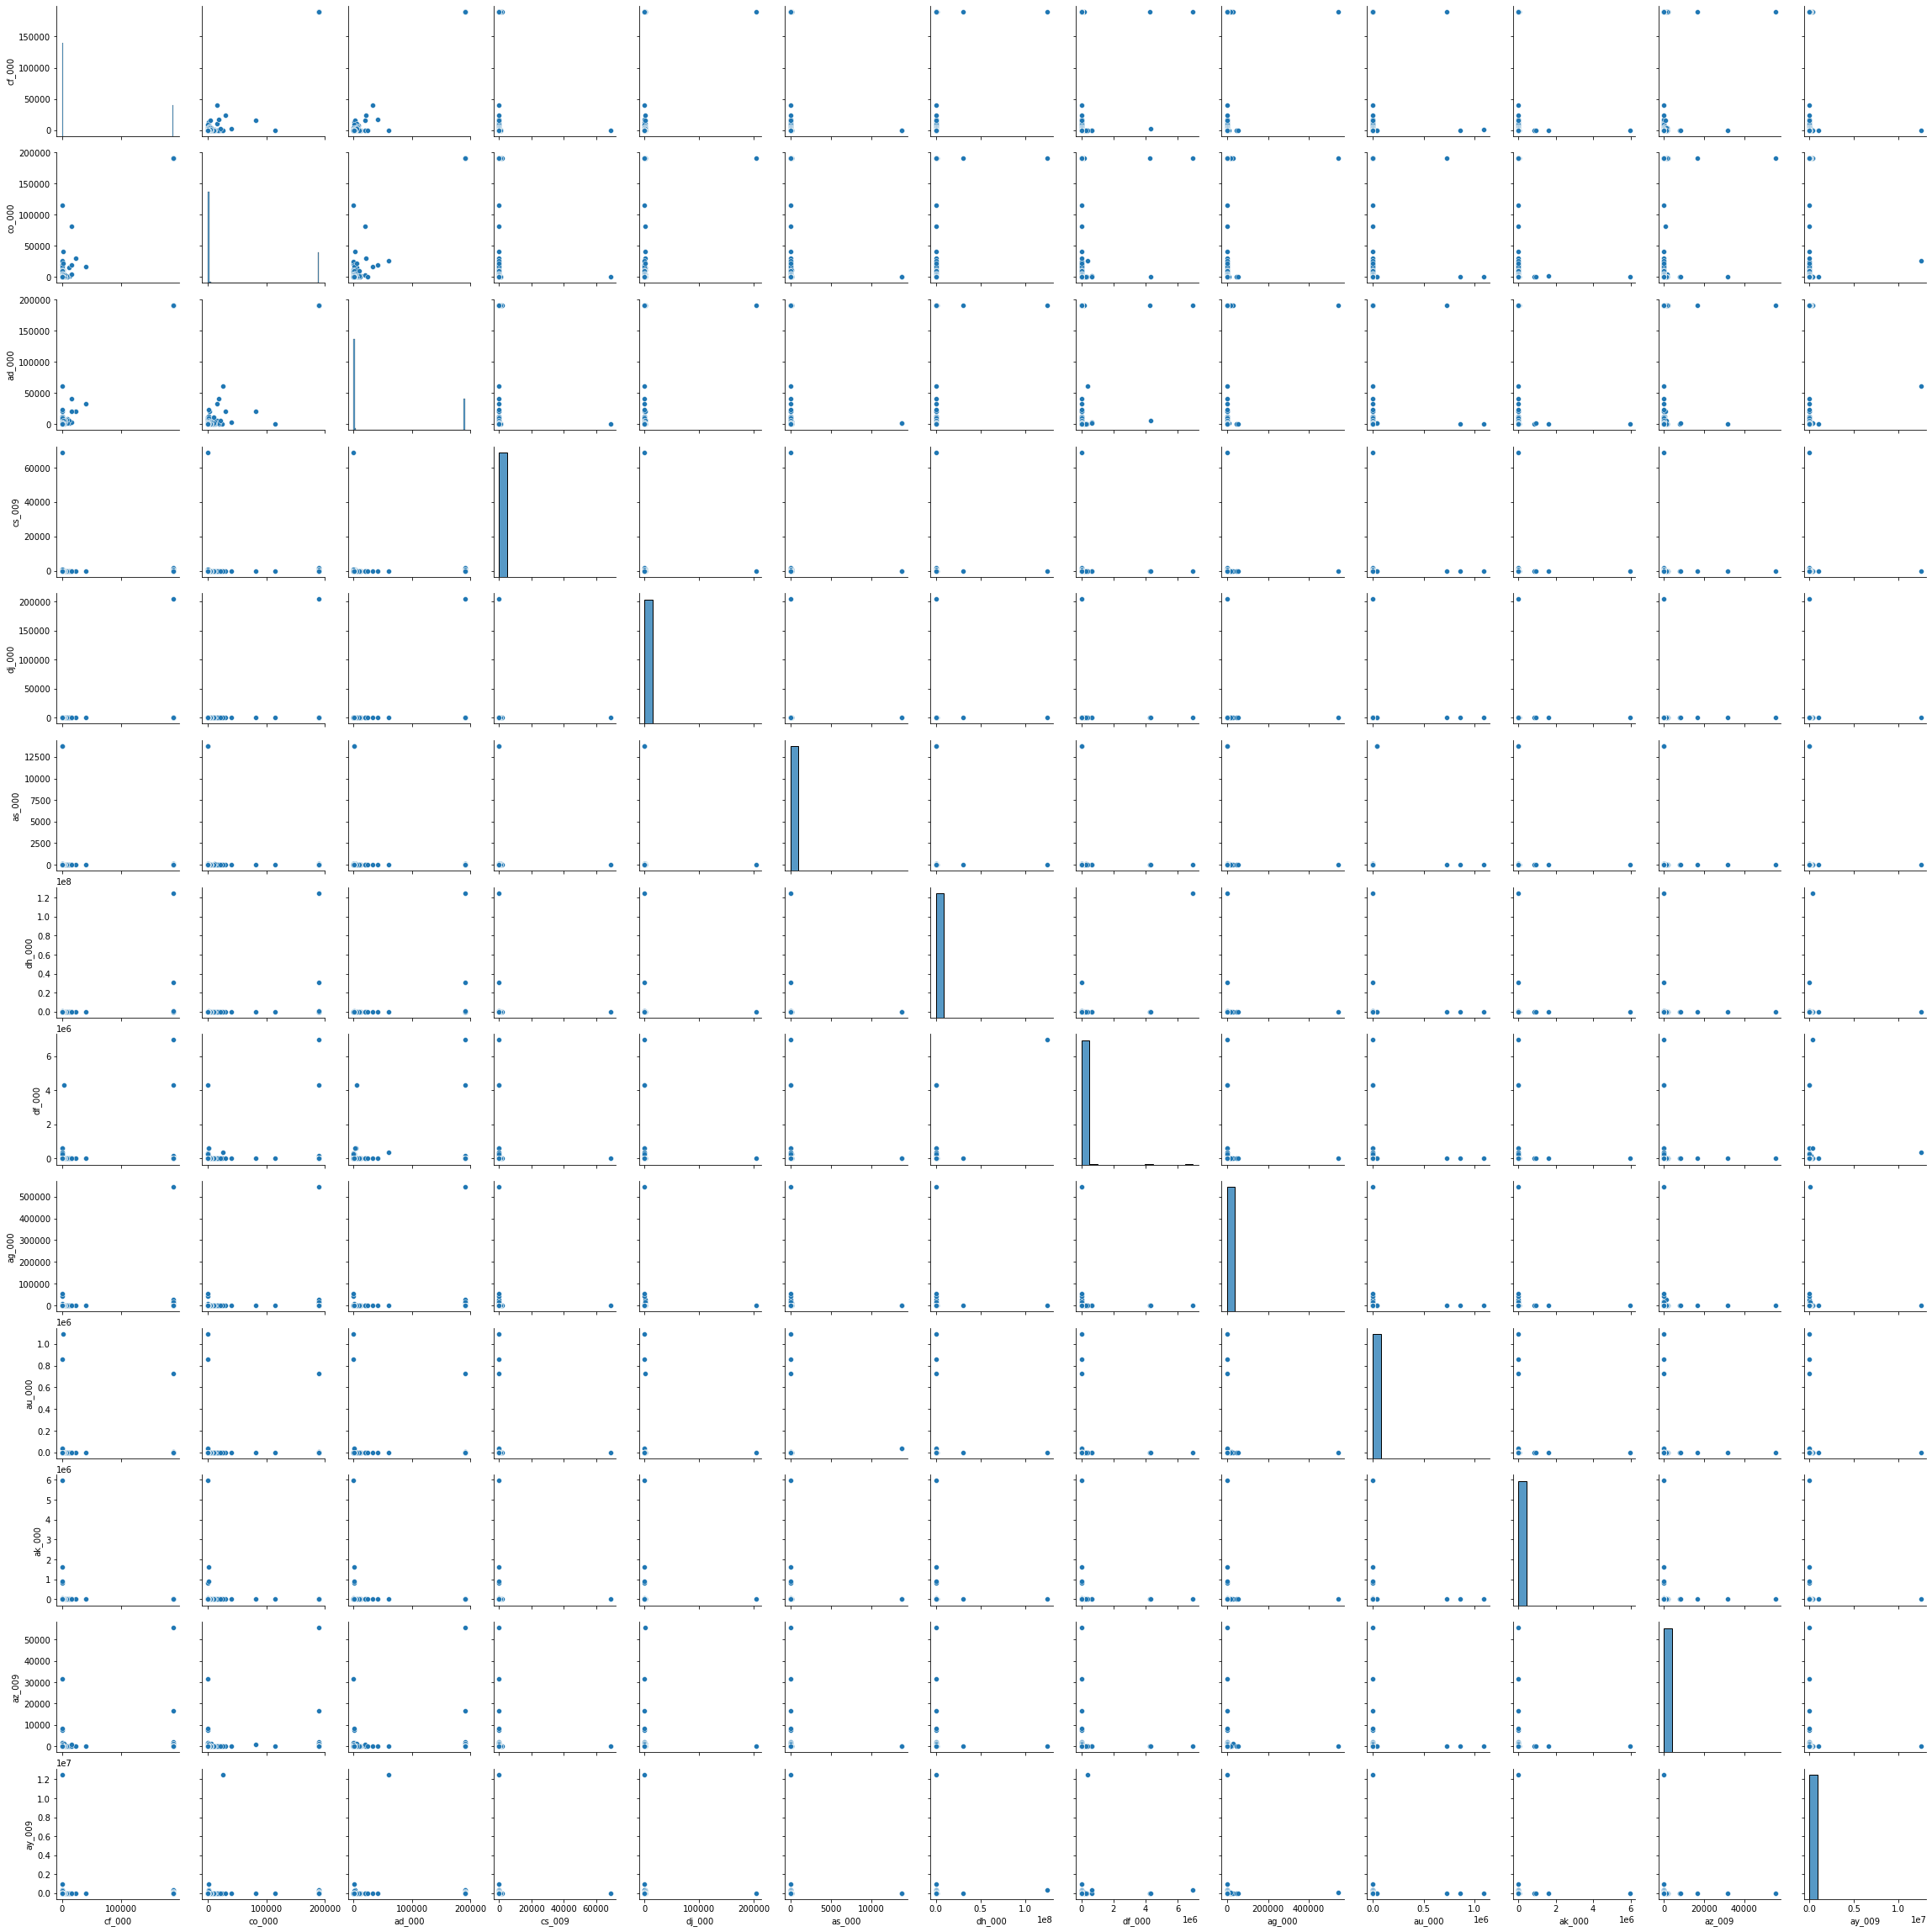

In [51]:
#scatter plot
train_sample=train_x[['cf_000','co_000','ad_000','cs_009','dj_000','as_000',
                     'dh_000','df_000','ag_000','au_000','ak_000','az_009','ay_009']].sample(6000)
sns.pairplot(train_sample)
plt.show()

<AxesSubplot:>

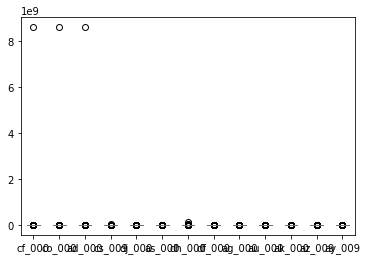

In [14]:
# boxplot
train_x[['cf_000','co_000','ad_000','cs_009','dj_000','as_000',
                     'dh_000','df_000','ag_000','au_000','ak_000','az_009','ay_009']].plot.box()

Base on the scatter plot above, I can see there are some positive linear relationship between variables. However, I am not able to draw conclusions about significance of those features just by the scatter plots. I need to fit the model further.

<h5>(b)v. Determine the number of positive and negative data. Is this data set imbal- anced?</h5>

In [35]:
data.groupby(['class']).size()

class
neg    74625
pos     1375
dtype: int64

As it shows above, the negative cases= 74625, and the postive cases = 1375, we can conclude that this data set is imbalanced.

In [33]:
train_df.groupby(['class']).size()

class
neg    59000
pos     1000
dtype: int64

As it shows above, the train negative cases= 59000, and the train postive cases = 1000, we can conclude that this data set is imbalanced.

In [34]:
test_df.groupby(['class']).size()

class
neg    15625
pos      375
dtype: int64

As it shows above, the test negative cases= 15625, and the test postive cases = 375, we can conclude that this data set is imbalanced.

<h5>(c) Train a random forest to classify the data set. Do NOT compensate for class imbalance in the data set. Calculate the confusion matrix, ROC, AUC, and misclassification for training and test sets and report them (You may use pROC package). Calculate Out of Bag error estimate for your random forset and compare it to the test error.</h5>

In [14]:
train_y=train_y.replace(to_replace = ['neg', 'pos'], value = [0, 1])
train_y

,class
0,0
1,0
2,0
3,0
4,0
...,...
59995,0
59996,0
59997,0
59998,0


In [15]:
test_y=test_y.replace(to_replace = ['neg', 'pos'], value = [0, 1])
test_y

,class
0,0
1,0
2,0
3,0
4,0
...,...
15995,0
15996,0
15997,0
15998,0


In [26]:
# train random forest
rfc=RandomForestClassifier(max_depth=2, random_state=0, bootstrap = True,oob_score=True)
rfc.fit(train_x,train_y.values.ravel())
predict_y=rfc.predict(test_x)

In [27]:
#confusion matrix
cm= metrics.confusion_matrix(test_y, predict_y)
cm= pd.DataFrame(cm, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
cm

,Predicted Negative,Predicted Positive
Actual Negative,15624,1
Actual Positive,304,71


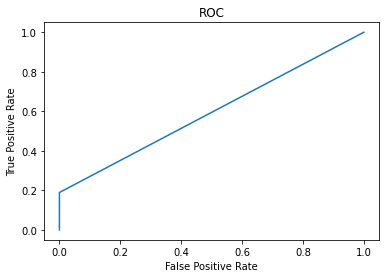

In [28]:
#ROC
fpr, tpr, _ = metrics.roc_curve(test_y, predict_y)
#create ROC curve
plt.plot(fpr,tpr)
plt.title('ROC')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [29]:
#AUC
auc = metrics.roc_auc_score(test_y, predict_y)
auc

0.5946346666666668

In [30]:
#misclassification
# calculate accuracy
accuracy=metrics.accuracy_score(test_y, predict_y)
misclassification = 1-accuracy
misclassification

0.019062499999999982

In [97]:
# test error
test_mse = mean_squared_error(test_y, predict_y)
test_mse

0.0190625

In [122]:
#Out of Bag error estimate 
rfc.oob_score_

0.9859

Compare out of bag error with test error, we can conclude that oob=0.9859, test error=0.0190625, when they add together, they close to 1. the out of bag error is close to the accuracy score.

<h5>(d) Research how class imbalance is addressed in random forests. Compensate for class imbalance in your random forest and repeat 1c. Compare the results with those of 1c.</h5>

In [31]:
clf= RandomForestClassifier(max_depth=2, random_state=0, bootstrap = True, oob_score=True,class_weight="balanced")
clf.fit(train_x,train_y.values.ravel())
predict_y1=clf.predict(test_x)

In [32]:
#confusion matrix
cm1= metrics.confusion_matrix(test_y, predict_y1)
cm1= pd.DataFrame(cm1, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
cm1

,Predicted Negative,Predicted Positive
Actual Negative,14674,951
Actual Positive,12,363


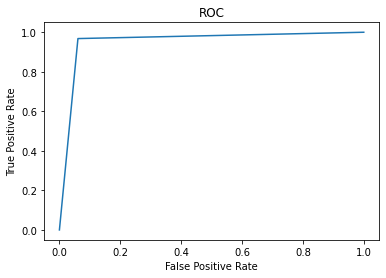

In [33]:
#ROC
fpr1, tpr1, _ = metrics.roc_curve(test_y, predict_y1)
#create ROC curve
plt.plot(fpr1,tpr1)
plt.title('ROC')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [130]:
#AUC
auc1 = metrics.roc_auc_score(test_y, predict_y1)
auc1

0.953568

In [131]:
#misclassification
# calculate accuracy
accuracy1=metrics.accuracy_score(test_y, predict_y1)
misclassification1 = 1-accuracy1
misclassification1

0.06018749999999995

In [132]:
# test error
test_mse = mean_squared_error(test_y, predict_y1)
test_mse

0.0601875

In [133]:
#Out of Bag error estimate 
clf.oob_score_

0.9357166666666666

After Compensating for class imbalance in random forest, we get oob=0.9357166666666666, test error=0.0601875 compare to the no compensating oob=0.9859, test error=0.0190625. The confusion matrix after compensating seems more balanced. 

<h5>(e) XGBoost and Model Trees</h5>

In [34]:
#Determine α (the regularization term) using cross-validation
alpha=[0.01, 0.1, 1, 10, 100]
test_error=[]
data_dmatrix = xgb.DMatrix(data=train_x, label=train_y)
for i in alpha:
    params = {'objective':'reg:linear','colsample_bytree':0.3,'learning_rate':0.1,
                'max_depth':5, 'alpha':i}
    # 5 foldcross validation
    cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=5,
                    num_boost_round=50, early_stopping_rounds=10, metrics='rmse', as_pandas=True, seed=42)  
    test_error.append(cv_results["test-rmse-mean"].tail(1).values[0])
test_error

[03:55:56] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[03:55:57] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[03:55:57] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[03:55:57] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[03:55:57] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[03:56:17] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_16451179485

[0.0732314, 0.0732184, 0.07325319999999999, 0.0769218, 0.09217239999999999]

In [35]:
# we choose alpha =0.1 since it has the lowest test error
params = {
            'objective':'binary:logistic',
            'max_depth': 4,
            'alpha': 0.1,
            'learning_rate': 1.0,
            'n_estimators':100
        }  
clf_xgb = XGBClassifier(**params)
clf_xgb.fit(train_x, train_y)
predict_y_xbg = clf_xgb.predict(test_x)

/Users/yangwenyu/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/yangwenyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yangwenyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using rav

[03:57:55] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [37]:
#confusion matrix
cm_xbg= metrics.confusion_matrix(test_y, predict_y_xbg)
cm_xbg= pd.DataFrame(cm_xbg, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
cm_xbg

,Predicted Negative,Predicted Positive
Actual Negative,15606,19
Actual Positive,86,289


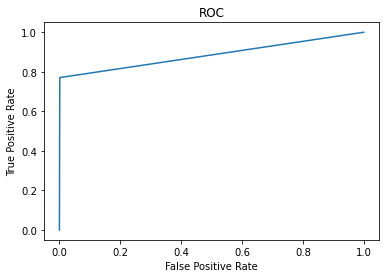

In [38]:
#ROC
fpr3, tpr3, _ = metrics.roc_curve(test_y, predict_y_xbg)
#create ROC curve
plt.plot(fpr3,tpr3)
plt.title('ROC')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [153]:
#AUC
auc_xbg = metrics.roc_auc_score(test_y, predict_y_xbg)
auc_xbg

0.8847253333333333

<h5>(f) Use SMOTE</h5>

In [16]:
sm = SMOTE(random_state=42)
train_x_new, train_y_new = sm.fit_resample(train_x, train_y)

In [18]:
#Determine α (the regularization term) using cross-validation
alpha=[0.01, 0.1, 1, 10, 100]
test_error=[]
data_dmatrix = xgb.DMatrix(data=train_x_new, label=train_y_new)
for i in alpha:
    params = {'objective':'reg:linear','colsample_bytree':0.3,'learning_rate':0.1,
                'max_depth':5, 'alpha':i}
    # 5 foldcross validation
    cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=5,
                    num_boost_round=50, early_stopping_rounds=10, metrics='rmse', as_pandas=True, seed=42)  
    test_error.append(cv_results["test-rmse-mean"].tail(1).values[0])
test_error

[03:47:27] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[03:47:27] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[03:47:28] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[03:47:28] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[03:47:29] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[03:48:23] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_16451179485

[0.1073758, 0.107348, 0.1083556, 0.111994, 0.1366214]

In [19]:
# we choose alpha =0.1 since it has the lowest test error
params = {
            'objective':'binary:logistic',
            'max_depth': 4,
            'alpha': 0.1,
            'learning_rate': 1.0,
            'n_estimators':100
        }  
clf_xgb_smote = XGBClassifier(**params)
clf_xgb_smote.fit(train_x_new, train_y_new)
predict_y_xbg_smote = clf_xgb_smote.predict(test_x)

/Users/yangwenyu/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/yangwenyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yangwenyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using rav

[03:52:51] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [21]:
#confusion matrix
cm_xbg_smote= metrics.confusion_matrix(test_y, predict_y_xbg_smote)
cm_xbg_smote= pd.DataFrame(cm_xbg_smote, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
cm_xbg_smote

,Predicted Negative,Predicted Positive
Actual Negative,15382,243
Actual Positive,59,316


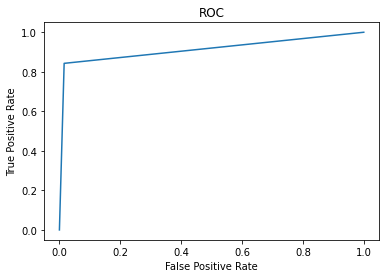

In [22]:
#ROC
fpr4, tpr4, _ = metrics.roc_curve(test_y, predict_y_xbg_smote)
#create ROC curve
plt.plot(fpr4,tpr4)
plt.title('ROC')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [23]:
#AUC
auc_xbg_smote = metrics.roc_auc_score(test_y, predict_y_xbg_smote)
auc_xbg_smote

0.9135573333333333

The uncompensated case has lower AUC=0.8847 than the SMOTE case AUC=0.91356, has higher ROC, higher TP, lower FN, higher FP, and lower TN. 

<h3>2. ISLR 6.6.3</h3>

(a). (iii)Steadily increase is correct. RSS will steadily increase as we increase s from 0, because we have more constraint which leades to more 0 beta coeficients. 
<br>
(b). (ii) Decrease initially, and then eventually start increasing in a U shape is correct. The model is less overfitting and test RSS will decrease when coefficient is 0. As the necessary coefficients be removed later, the test RSS will increase and form a U shape.
<br>
(c). (iii)Steadily increase is correct. Variance will steadily increase as we increase s from 0, because we have more flexibility. 
<br>
(d). (iv) Steadily decrease is correct. Squared bias will steadily decrease as we increase s from 0, because we have more flexibility and less bias.
<br>
(e). (v) Remain constant is correct. The irreducible error does not change as we increase s from 0 becuase it deos not depend on flexibility.

<h3>3. ISLR 6.6.5</h3>

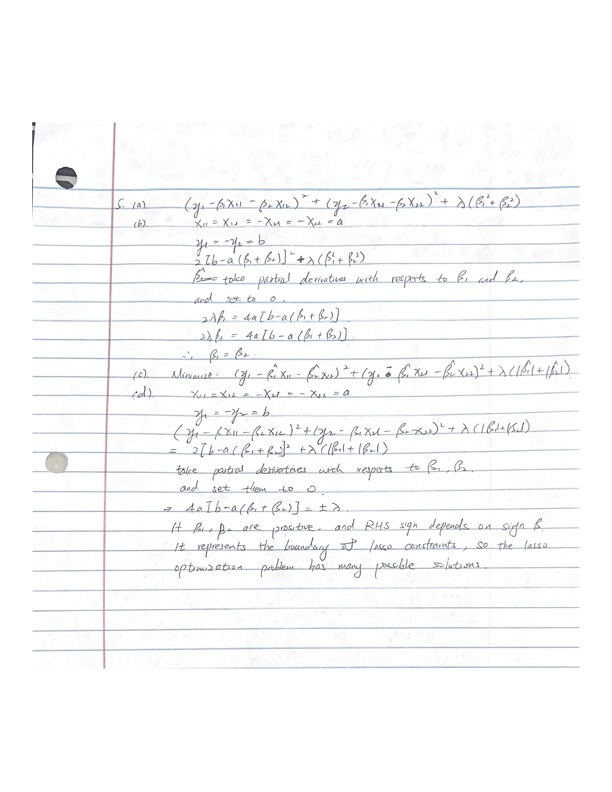

<h3>4. ISLR 8.4.5</h3>

In [52]:
# average probability
avg=(0.1+0.15+0.2+0.2+0.55+0.6+0.6+0.65+0.7+0.75)/10
avg


0.45

The majority vote approach, we would classify the x to red since there are 6 out of 10 probability is greater than 0.5. The average probability approach, we would classify the x to green since the average probablity=0.45 less than 0.5.

<h3>5. ISLR 9.7.3</h3>

<h5>(a) Sketch the observations.</h5>

In [78]:
d = {'x1': [3, 2 ,4 ,1 ,2 ,4,4], 'x2': [4, 2 ,4 ,4, 1, 3 ,1], 'y': ['red','red','red','red','blue','blue','blue']} #red=1, blue=0
df = pd.DataFrame(data=d)
df

,x1,x2,y
0,3,4,red
1,2,2,red
2,4,4,red
3,1,4,red
4,2,1,blue
5,4,3,blue
6,4,1,blue


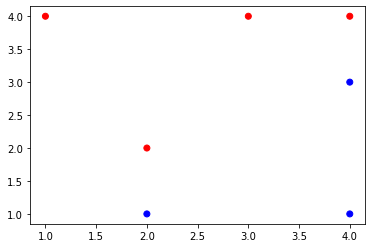

In [79]:
plt.scatter(df['x1'],df['x2'],c=df['y'])
plt.show()

<h5>(b) Sketch the optimal separating hyperplane, and provide the equa- tion for this hyperplane (of the form (9.1)).</h5>

Using the points (2, 1.5) and (4, 3.5), we derive the slope = (3.5 - 1.5) / (4 - 2) = 2 / 2 = 1.
<br>
y - 3.5 = 1 * (x - 4.5)
<br>
y = x - 0.5
<br>
slope=1, intercept=-0.5

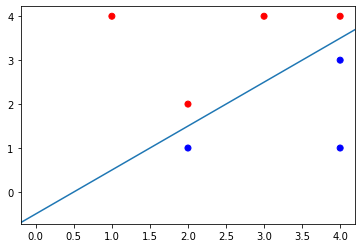

In [95]:
fig, ax = plt.subplots()
plt.scatter(df['x1'],df['x2'],c=df['y'])
ax.axline((0,-0.5),slope=1, color='C0')
plt.show()

<h5>(c) Provide the values for β0, β1, and β2.</h5>

Classify to Red if beta0 + beta1 * X1 + beta2 * X2 > 0, and classify to Blue otherwise.beta0 = 0.5,beta1 = -1,beta2 = 1

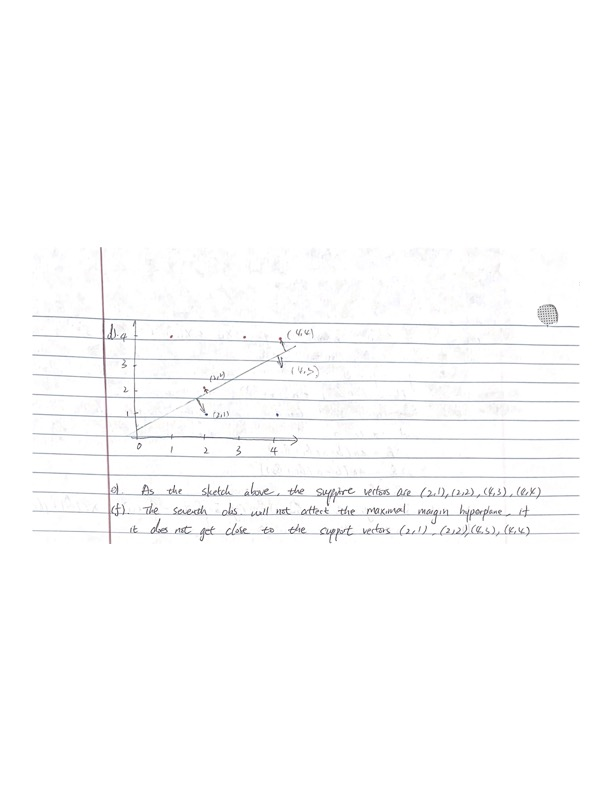

<h5>(g) Sketch a hyperplane that is not the optimal separating hyperplane, and provide the equation for this hyperplane.</h5>

Using the points (1, 0) and (5, 5), slop= (5 - 0) / (5 - 1) = 5 / 4 = 1.25
<br>
<br>
y - 5 = 1.25 * (x - 5)
<br>
y = 1.25x - 1.25
<br>
slope=1.25, intercept=-1.25

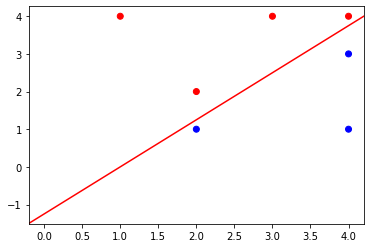

In [101]:
fig, ax = plt.subplots()
plt.scatter(df['x1'],df['x2'],c=df['y'])
ax.axline((0,-1.25),slope=1.25, color='red')
plt.show()

<h5>h) Draw an additional observation on the plot so that the two classes are no longer separable by a hyperplane.</h5>

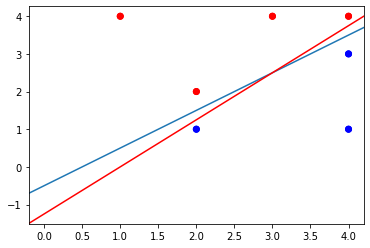

In [102]:
fig, ax = plt.subplots()
plt.scatter(df['x1'],df['x2'],c=df['y'])
ax.axline((0,-0.5),slope=1, color='C0')
plt.scatter(df['x1'],df['x2'],c=df['y'])
ax.axline((0,-1.25),slope=1.25, color='red')
plt.show()